In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
def max_min_filtering(img, K=3):
    if len(img.shape) == 3:
        h, w, ch = img.shape
        
        ## Zero padding
        pad = K // 2
        out = np.zeros((h + pad * 2, w + pad * 2, 3), dtype=np.float)
        out[pad: pad+ h, pad: pad + w] = img.copy().astype(np.float)
        tmp = out.copy()
        
        # filtering
        for y in range(h):
            for x in range(w):
                for c in range(ch):
                    out[pad + y, pad + x, c] = np.max(tmp[y: y + K, x: x + K, c]) - np.min(tmp[y: y + K, x: x + K, c])
        
        out = out[pad: pad + h, pad: pad + w].astype(np.uint8)
    
    else:
        h, w = img.shape
        
        ## Zero padding
        pad = K // 2
        out = np.zeros((h + pad * 2, w + pad * 2), dtype=np.float)
        out[pad: pad+ h, pad: pad + w] = img.copy().astype(np.float)
        tmp = out.copy()       

        # filtering
        for y in range(h):
            for x in range(w):
                out[pad + y, pad + x] = np.max(tmp[y: y + K, x: x + K]) - np.min(tmp[y: y + K, x: x + K])
        
        out = out[pad: pad + h, pad: pad + w].astype(np.uint8)
        
    return out
        

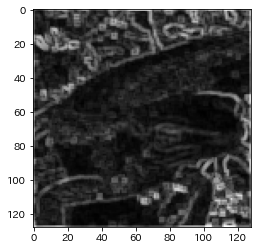

In [13]:
# Read img, Grayscale
img = cv2.imread("../assets/imori.jpg", 0)
# Max-min filtering
out = max_min_filtering(img, K=3)
plt.imshow(out, cmap="gray")

In [14]:
# Set kernel, Differential kernel
## kernel V
K_v = np.array([[0,-1,0],
                            [0,1,0],
                            [0,0,0]], np.float)

## kernel H
K_h = np.array([[0,0,0],
                            [-1,1,0],
                            [0,0,0]], np.float)

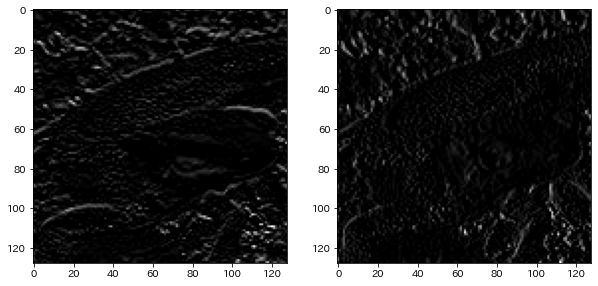

In [19]:
# Differential filtering
## Longitudinal distance
img_v = cv2.filter2D(img, -1, K_v).astype(np.uint8)

## Lateral distance
img_h = cv2.filter2D(img, -1, K_h).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_v, cmap="gray")
plt.subplot(122)
plt.imshow(img_h, cmap="gray")

In [20]:
# Set kernel, Prewitt kernel
## kernel V
K_v2 = np.array([[1,1,1],
                            [0,0,0],
                            [-1,-1,-1]], np.float)

## kernel H
K_h2 = np.array([[1,0,-1],
                            [1,0,-1],
                            [1,0,-1]], np.float)

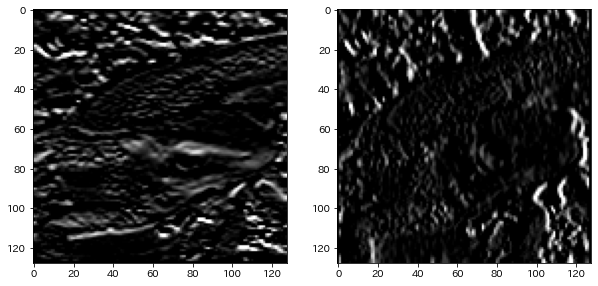

In [21]:
# Prewitt filtering
## Longitudinal distance
img_v2 = cv2.filter2D(img, -1, K_v2).astype(np.uint8)

## Lateral distance
img_h2 = cv2.filter2D(img, -1, K_h2).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_v2, cmap="gray")
plt.subplot(122)
plt.imshow(img_h2, cmap="gray")

In [24]:
# Set kernel, Sobel kernel
## kernel V
K_v3 = np.array([[1,2,1],
                            [0,0,0],
                            [-1,-2,-1]], np.float)

## kernel H
K_h3 = np.array([[1,0,-1],
                            [2,0,-2],
                            [1,0,-1]], np.float)

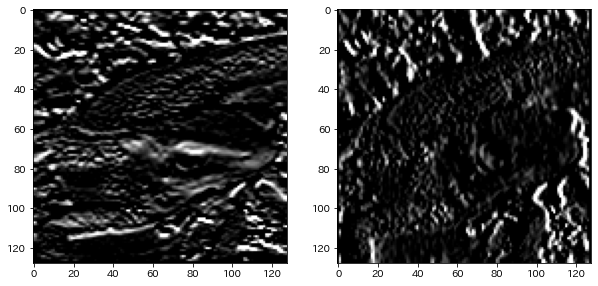

In [25]:
# Sobel filtering
## Longitudinal distance
img_v3 = cv2.filter2D(img, -1, K_v3).astype(np.uint8)

## Lateral distance
img_h3 = cv2.filter2D(img, -1, K_h3).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_v3, cmap="gray")
plt.subplot(122)
plt.imshow(img_h3, cmap="gray")

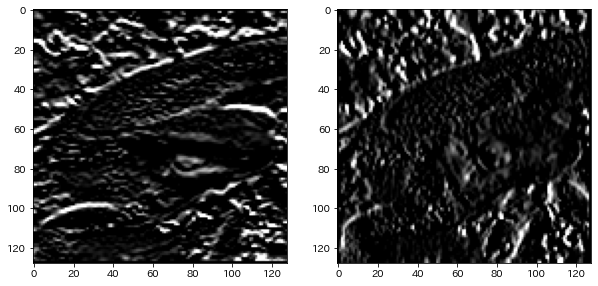

In [26]:
# Other answer, Sobel filtering
## Longitudinal distance
sobelx = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)
## Lateral distace
sobely = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(sobelx, cmap="gray")
plt.subplot(122)
plt.imshow(sobely, cmap="gray")